In [20]:
from torchvision.models import vit_b_32, ConvNeXt_Large_Weights
from torchvision.models import convnext_small, ConvNeXt_Small_Weights
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append("..")
from utils import get_best_available_device
from dataset import ImageDataset
import matplotlib.pyplot as plt

# 1. Get dataset

In [42]:
BATCH_SIZE = 32
device = get_best_available_device()

dataset = ImageDataset(path="../../data/training/", device="cpu", use_patches=False)
dataloader = iter(DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True))

Loading images:   0%|          | 0/134 [00:00<?, ?it/s]

Loading images:   0%|          | 0/134 [00:00<?, ?it/s]

In [46]:
print(f"There are {len(dataloader)} images in the dataset.")

There are 26 images in the dataset.


Index: 377, mod: 5
Index: 675, mod: 3
Index: 109, mod: 1
Index: 318, mod: 0
Index: 272, mod: 2
Index: 515, mod: 5
Index: 450, mod: 0
Index: 284, mod: 2
Index: 711, mod: 3
Index: 166, mod: 4
Index: 516, mod: 0
Index: 330, mod: 0
Index: 497, mod: 5
Index: 260, mod: 2
Index: 334, mod: 4
Index: 599, mod: 5
Index: 627, mod: 3
Index: 198, mod: 0
Index: 464, mod: 2
Index: 76, mod: 4
Index: 2, mod: 2
Index: 101, mod: 5
Index: 456, mod: 0
Index: 561, mod: 3
Index: 45, mod: 3
Index: 467, mod: 5
Index: 547, mod: 1
Index: 381, mod: 3
Index: 490, mod: 4
Index: 347, mod: 5
Index: 357, mod: 3
Index: 707, mod: 5


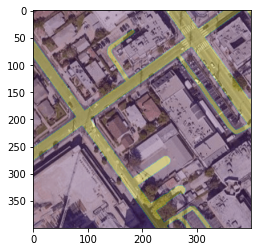

In [43]:
batch = next(dataloader)
images, masks = batch

plt.imshow(images[0].numpy().transpose(1, 2, 0))
plt.imshow(masks[0].numpy().transpose(1, 2, 0), alpha=0.3)
plt.show()

# 2. Create model and load weights

In [30]:
weights = ConvNeXt_Small_Weights.IMAGENET1K_V1
model = convnext_small(weights=weights).to("cpu")

In [36]:
import json

with open('imagenet_labels.json', 'r') as f:
    labels = json.load(f)["labels"]


In [31]:
preprocess = weights.transforms()

In [45]:
out = model(preprocess(images))
out.shape


torch.Size([32, 1000])

# 3. Predict features for one image